In [1]:
# encoding=utf8  
# from __future__ import absolute_import
# from __future__ import division
# from __future__ import print_function

import collections
import math
import os
import random
# import zipfile

import numpy as np
import pandas as pd
# from six.moves import urllib
# from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf


In [2]:
df = pd.read_pickle('data_ready.pkl')

In [18]:
df.head()

,OUT_HOSP_DIAGNOSISNAME_n,medlist_n
0,[胰腺炎],"[胰腺炎, 胃肠置管减压, 一次性密闭输液接头, 胰腺炎, 红细胞沉降率测定, 维生素C, ..."
3,[胆囊炎],"[胆囊炎, 艾司唑仑, 血游离有机酸测定, 自费西药, 凝血功能常规检查, 胆囊炎, 气垫床..."
4,[普通病],"[舒血宁注射液, 迈之灵片, 加味藿香正气软胶囊, 普通病, 普通病, 普通病, 普通病, ..."
8,"[月经失调, 子宫良性肿]","[子宫良性肿, 月经失调, 子宫良性肿, 月经失调, 子宫良性肿, 克林霉素, 血府逐瘀丸,..."
10,[耳痛],"[头孢地尼, 一次性真空采血器, 耳痛, 耳声发射检查, 抗甲状腺过氧化物酶抗体测定, 黄芩..."


In [4]:
# word2id, id2word = dict(), dict()
# for line in df.itertuples():
    
# #     print(line)
#     line[1].extend(line[2])
#     for i in line[1]:
#         if i not in word2id:
#             word2id[i] = len(word2id)
# id2word = dict(zip(word2id.values(), word2id.keys()))

In [5]:
# # Data size
# print('Data size', len(word2id))

In [6]:
# def t(arr):
    
#     return [word2id[i] for i in list(arr)]

# df['nameid'] = df['OUT_HOSP_DIAGNOSISNAME_n'].apply(t)
# df['medlistid'] = df['medlist_n'].apply(t)

In [7]:
import itertools

In [8]:
df.shape

(35277, 2)

In [78]:
import random
from matplotlib.cbook import flatten
train_set = []
count = 0
# for line in df.iloc[:20000, :].itertuples():
for line in df.itertuples():
    if count % 1000 == 0:
        print(count)
        print(len(train_set))
    count += 1
#     print(line[3])
#     print(line[4])
    t2 = list(set(line[2])-set(line[1]))
    for i in line[1]:
        tl = [i] * len(t2)
        
        tl = list(flatten(zip(tl, t2)))
        tl = [ii.strip() for ii in tl]
        train_set.append(tl)
#         for _ in range(len(tl)//2):
#             random.shuffle(tl)
#             train_set.append(tl)
            

0
0
1000
1230
2000
2708
3000
4494
4000
6418
5000
8358
6000
10360
7000
12372
8000
14506
9000
16202
10000
17679
11000
19473
12000
21291
13000
23130
14000
24996
15000
26880
16000
28754
17000
30726
18000
32757
19000
34830
20000
36973
21000
39172
22000
41393
23000
43581
24000
45811
25000
48058
26000
50245
27000
52510
28000
54772
29000
57149
30000
59542
31000
61943
32000
64349
33000
66735
34000
69120
35000
71488


In [23]:
len(df.iloc[0,1])

419

In [63]:
len(train_set[1])

2492

In [77]:
print(train_set[3])

['月经失调', '克林霉素', '月经失调', '止痛化癥颗粒', '月经失调', '血府逐瘀丸']


In [79]:
print(len(train_set))

72158


In [66]:
from gensim.models import Word2Vec
import multiprocessing

In [119]:
print(datetime.now())
model = Word2Vec(train_set, size=128, window=3, min_count=1,
        workers=multiprocessing.cpu_count())
print(datetime.now())

2019-05-23 12:44:00.959508
2019-05-23 12:44:06.730754


In [34]:
from datetime import datetime

In [120]:
model.wv.__getitem__('胰腺炎')

array([-0.03335608, -0.18704772, -0.19868349, -0.16034892,  0.26388595,
       -0.22939725,  0.05922069, -0.85226643,  0.20411146, -0.07666889,
        0.28429133,  0.7236617 , -0.5538859 , -0.68587124, -0.23736648,
        0.04764559, -0.23302148,  0.4458206 ,  0.1058102 , -0.05540902,
       -0.1304691 , -0.21061456,  0.41738904, -0.20291111, -0.07367181,
       -1.1365684 ,  0.39195007,  0.30630952, -0.4069159 , -0.528131  ,
        1.0565252 , -0.18445048,  0.56899726,  0.13206245,  0.25111735,
       -0.4207065 ,  0.05056845, -0.7112832 , -0.06124696,  0.31710806,
        0.1688644 ,  0.11578419,  1.0694736 , -0.01755844,  0.3143474 ,
        0.99829966,  0.14249697, -0.653495  ,  0.6314471 , -0.0241567 ,
       -0.20356737,  0.02317483, -0.85616237, -0.15257514,  0.63959104,
       -0.0177395 , -0.98653877,  0.0333402 ,  0.58017427, -0.68504274,
        0.5062858 ,  0.4490869 ,  0.16010028, -0.03673303,  0.10007454,
       -0.29281706, -0.0512711 , -0.4353681 ,  0.27302352, -0.01

In [139]:
df.head(10)

,OUT_HOSP_DIAGNOSISNAME_n,medlist_n
0,[胰腺炎],"[胰腺炎, 胃肠置管减压, 一次性密闭输液接头, 胰腺炎, 红细胞沉降率测定, 维生素C, ..."
3,[胆囊炎],"[胆囊炎, 艾司唑仑, 血游离有机酸测定, 自费西药, 凝血功能常规检查, 胆囊炎, 气垫床..."
4,[普通病],"[舒血宁注射液, 迈之灵片, 加味藿香正气软胶囊, 普通病, 普通病, 普通病, 普通病, ..."
8,"[月经失调, 子宫良性肿]","[子宫良性肿, 月经失调, 子宫良性肿, 月经失调, 子宫良性肿, 克林霉素, 血府逐瘀丸,..."
10,[耳痛],"[头孢地尼, 一次性真空采血器, 耳痛, 耳声发射检查, 抗甲状腺过氧化物酶抗体测定, 黄芩..."
11,[皮肤挫伤],"[丹参注射液, 皮肤挫伤, 复方感冒灵颗粒, 数字化摄影, 奥硝唑, 十味活血丸, 小换药,..."
14,[高血压],"[肺力咳合剂, 高血压, 高血压, 拉贝洛尔, 乳癖消颗粒, 高血压, 高血压, 高血压, ..."
19,[足感染],"[足感染, 足感染, 足感染, 左奥硝唑氯化钠, 尿常规, 血清肌酸激酶－MB同工酶活性测定..."
20,[疱疹性湿疹],"[玉竹, 疱疹性湿疹, 氯化钠, 茶苯海明, 疱疹性湿疹, 疱疹性湿疹, 疱疹性湿疹, 利巴..."
23,[便血],"[一次性留置针, 短效胰岛素, 布比卡因, 便血, 复方氯化钠, 自费西药, 便血, 便血,..."


In [138]:
model.wv.similarity("耳声发射检查", "克林霉素")

0.23756897

In [137]:
model.wv.similarity("止痛化癥颗粒", "克林霉素")

0.2580729

In [136]:
model.wv.similarity("月经失调", "克林霉素")

-0.01999385

In [135]:
model.wv.similarity("胰腺炎", "胃肠置管减压")

0.17574172

In [134]:
model.wv.similarity("胰腺炎", "艾司唑仑")

0.016776644

In [133]:
model.wv.similarity("胰腺炎", "迈之灵片")

0.014230398

In [142]:
model.wv.most_similar("疱疹性湿疹")

[('带状疱疹 NOS', 0.8495499491691589),
 ('关节紊乱', 0.80036860704422),
 ('躯干皮肤感染', 0.7916285395622253),
 ('单纯疱疹 NOS', 0.7808650732040405),
 ('关节周炎', 0.779388964176178),
 ('病毒性皮疹', 0.7791787385940552),
 ('指关节扭伤', 0.7768033742904663),
 ('足软组织疾患', 0.7767568230628967),
 ('颈部软组织感染', 0.7728617191314697),
 ('神经痛和神经炎', 0.7698603272438049)]

In [141]:
model.wv.most_similar("便血")

[('复杂性肛瘘', 0.7500916719436646),
 ('膀胱肿瘤', 0.7368989586830139),
 ('胃肠功能紊乱  胃肠功能紊乱', 0.7309930324554443),
 ('不完全性肠梗阻', 0.7002211809158325),
 ('<中医>便血病', 0.700084924697876),
 ('内痔伴特指并发症', 0.6999020576477051),
 ('贲门恶性肿瘤', 0.6970282793045044),
 ('肛瘘', 0.6942776441574097),
 ('小肠溃疡', 0.693221926689148),
 ('血栓性痔', 0.689896285533905)]

In [131]:
model.wv.most_similar("耳痛")

[('分泌性中耳炎', 0.8349764943122864),
 ('咽鼓管炎', 0.821786642074585),
 ('急性分泌性中耳炎', 0.8100705146789551),
 ('急性鼻咽炎', 0.799845278263092),
 ('萎缩性鼻炎', 0.7952395677566528),
 ('外耳道炎', 0.790174126625061),
 ('外耳炎', 0.7881928086280823),
 ('慢性中耳炎', 0.7867864370346069),
 ('鼻咽炎', 0.7667851448059082),
 ('咽部异物', 0.7641884088516235)]

In [121]:
model.wv.most_similar("胰腺炎")

[('食管恶性肿瘤个人史', 0.8428035974502563),
 ('胃息肉', 0.8205012083053589),
 ('手术后恶性肿瘤化学治疗', 0.817989706993103),
 ('胃溃疡伴出血', 0.812181293964386),
 ('肺恶性肿瘤史', 0.8098534345626831),
 ('胃癌', 0.8095508813858032),
 ('心源性晕厥', 0.8055463433265686),
 ('胰腺肿瘤', 0.790556013584137),
 ('药物和药剂有害效应', 0.7903257012367249),
 ('横纹肌溶解症', 0.7886874675750732)]

In [127]:
model.wv.most_similar("胆囊炎")

[('胆管炎', 0.719937264919281),
 ('急性胆囊炎', 0.7158150672912598),
 ('慢性胆囊炎', 0.6995885372161865),
 ('胆囊结石', 0.6970759630203247),
 ('胆囊炎 NOS', 0.6685572266578674),
 ('胆管结石伴胆囊炎', 0.6450380086898804),
 ('胆囊结石伴急性胆囊炎', 0.6409815549850464),
 ('胆囊结石伴胆囊炎', 0.6354383230209351),
 ('胆囊息肉', 0.6267516613006592),
 ('胆道感染', 0.6204642057418823)]

In [128]:
model.wv.most_similar("普通病")

[('特殊病号：Z08.101', 0.8195757865905762),
 ('普通', 0.8037562370300293),
 ('特殊病号：F29  01', 0.7389662265777588),
 ('特殊病号：Z85.900', 0.72437584400177),
 ('舌脓肿', 0.6817734241485596),
 ('特殊病号：Z86.401', 0.6809532642364502),
 ('口腔粘膜嗜酸性肉芽肿', 0.6731594204902649),
 ('特殊病号：D61.905', 0.6636654138565063),
 ('品他病', 0.6607224941253662),
 ('特殊病号：C95.901', 0.6583153009414673)]

In [129]:
model.wv.most_similar("月经失调")

[('子宫炎性疾病', 0.7469663619995117),
 ('月经调节', 0.7381690144538879),
 ('月经稀少', 0.7241538763046265),
 ('痛经', 0.7026767134666443),
 ('细菌性阴道炎', 0.6985628604888916),
 ('宫血', 0.6926313638687134),
 ('子宫', 0.6855760216712952),
 ('宫颈息肉', 0.6855278015136719),
 ('子宫炎性', 0.6854851245880127),
 ('经期延长', 0.6841460466384888)]

In [130]:
model.wv.most_similar("子宫良性肿")

[('围绝经期', 0.9213745594024658),
 ('滴虫性阴道炎  阴道异常产妇医疗', 0.9153485894203186),
 ('排卵期出血', 0.9141361713409424),
 ('宫腔息肉', 0.9140002131462097),
 ('慢性输卵管-', 0.9113892316818237),
 ('梅尼埃病  子宫平滑肌瘤', 0.9098644256591797),
 ('慢性子宫内膜', 0.9086737036705017),
 ('女性继发性不育', 0.9045261740684509),
 ('子宫体良性肿瘤', 0.90229332447052),
 ('卵巢囊', 0.9022029042243958)]

In [50]:
import matplotlib.pyplot as plt

In [122]:
l = []
for i in df.iloc[0, 0]:
    for ii in set(df.iloc[0, 1]):
        if i == ii:
            continue
        if ii not in list(df.iloc[1, 1]):
            print(i, ii.strip(), model.wv.similarity(i, ii.strip()))
            l.append(model.wv.similarity(i, ii.strip()))

胰腺炎 氯丙嗪 0.32601827
胰腺炎 红细胞流变特性检测 0.1634681
胰腺炎 替吉奥 0.47924393
胰腺炎 膀胱残余尿量测定 0.17951885
胰腺炎 中心静脉穿刺置管术 0.36921692
胰腺炎 静脉导管 0.37410948
胰腺炎 杭州市副省可使用的西药 -0.069372274
胰腺炎 一次性密闭输液接头 0.3243491
胰腺炎 吗啡 0.3218124
胰腺炎 骨髓特殊染色及酶组织化学染色检查 0.35177392
胰腺炎 七叶神安片 0.12730783
胰腺炎 便通胶囊 0.17256431
胰腺炎 引流管 0.30519718
胰腺炎 短效胰岛素类似物 0.3045384
胰腺炎 钆贝葡胺 0.30274644
胰腺炎 微量泵输液 0.27976853
胰腺炎 硫酸镁 0.28038746
胰腺炎 孟鲁司特 0.09571703
胰腺炎 复方苦参注射液 0.3244881
胰腺炎 人血白蛋白 0.31303138
胰腺炎 胃泌素测定 0.19732738


(array([1., 0., 0., 2., 4., 0., 6., 6., 1., 1.]),
 array([-0.06937227, -0.01451065,  0.04035097,  0.09521259,  0.15007421,
         0.20493583,  0.25979745,  0.31465906,  0.3695207 ,  0.4243823 ,
         0.47924393], dtype=float32),
 <a list of 10 Patch objects>)

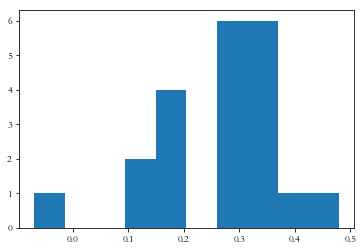

In [123]:
plt.hist(l)

(array([  5.,   7.,  59., 112., 195., 202., 184., 146.,  66.,  16.]),
 array([-0.36896995, -0.28605497, -0.20313996, -0.12022497, -0.03730997,
         0.04560502,  0.12852001,  0.211435  ,  0.29435   ,  0.37726498,
         0.46017998], dtype=float32),
 <a list of 10 Patch objects>)

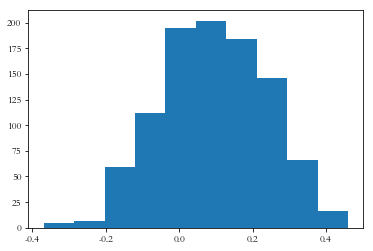

In [124]:
l = []
for i in df.iloc[0, 0]:
    for ii in set(df.iloc[1, 1]):
        if i == ii:
            continue
#         print(i, ii.strip(), model.wv.similarity(i, ii.strip()))
        if ii not in list(df.iloc[0, 1]) and ii != '普通病':
#             print(i, ii.strip(), model.wv.similarity(i, ii.strip()))
            l.append(model.wv.similarity(i, ii.strip()))

plt.hist(l)

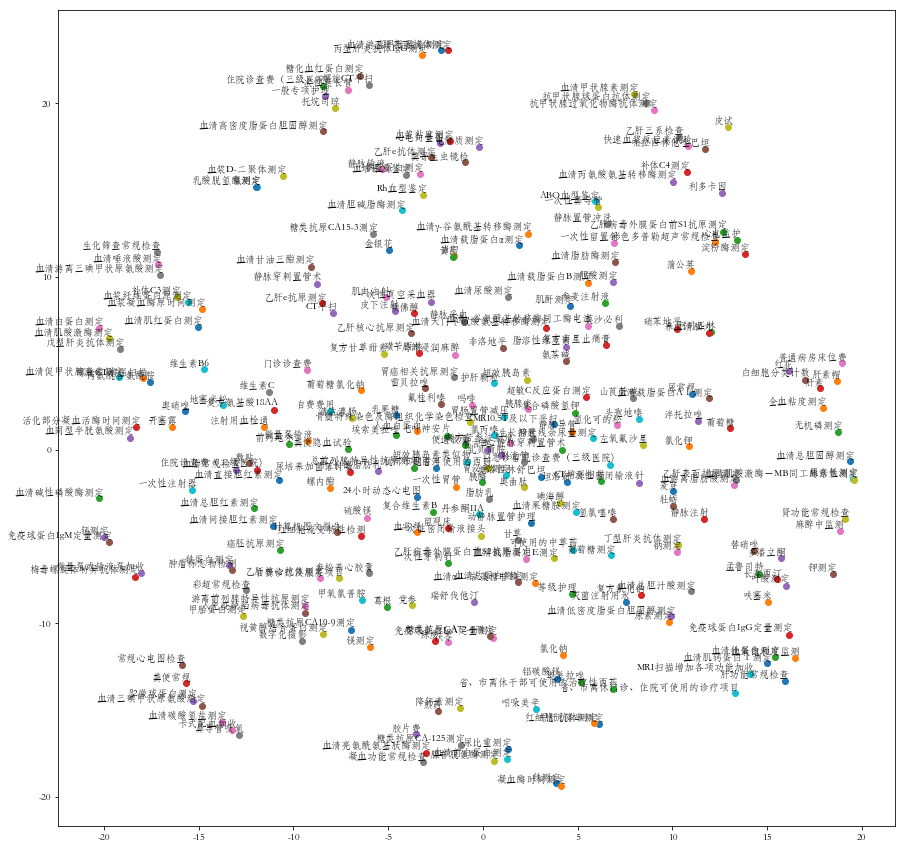

In [118]:
# Step 6: Visualize the embeddings.

plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    # 设置图片大小
    plt.figure(figsize=(15, 15))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

    plt.savefig(filename)

try:
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt

    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')# mac：method='exact'
    # 画500个点
    plot_only = 500
    low_dim_embs = []
    labels = []
    for line in df.itertuples():
        t2 = list(set(line[2])-set(line[1]))
        for i in line[1]:
            t2.append(i)
            for ii in t2:
                labels.append(ii.strip())
                low_dim_embs.append(model.wv.__getitem__(ii.strip()))
        break
            
    low_dim_embs = tsne.fit_transform(np.array(low_dim_embs))        
    plot_with_labels(low_dim_embs, labels)

except ImportError:
    print("Please install sklearn, matplotlib, and scipy to visualize embeddings.")

In [43]:
model.wv.similarity("胰腺炎", "艾司唑仑")

0.013466876

In [42]:
model.wv.similarity("胰腺炎", "红细胞沉降率测定")

0.14645562

In [41]:
model.wv.similarity("胰腺炎", "胃肠置管减压")

0.1919024

In [39]:
model.wv.similarity("胰腺炎", "胆囊炎")

-0.03224509

In [40]:
model.wv.similarity("胰腺炎", "普通病")

0.16480318

In [ ]:
model.wv.init_sims(replace=True)#Precompute L2-normalized vectors.
model.save('tt.model')

In [6]:
data_index = 0

# Step 3: Function to generate a training batch for the skip-gram model.
def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    
    span = 2 * skip_window + 1  # [ skip_window target skip_window ]
    buffer = collections.deque(maxlen=span)
    # [ skip_window target skip_window ]
            # [ skip_window target skip_window ]
                    # [ skip_window target skip_window ]
            
#     [0 1 2 3 4 5 6 7 8 9 ...]
#            t     i  
    # 循环3次
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    # 获取batch和labels
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [skip_window]
        # 循环2次，一个目标单词对应两个上下文单词
        for j in range(num_skips):
            while target in targets_to_avoid:
                # 可能先拿到前面的单词也可能先拿到后面的单词
                target = random.randint(0, span - 1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    # Backtrack a little bit to avoid skipping words in the end of a batch
    # 回溯3个词。因为执行完一个batch的操作之后，data_index会往右多偏移span个位置
    data_index = (data_index + len(data) - span) % len(data)
    return batch, labels

# 打印sample data
batch, labels = generate_batch(batch_size=8, num_skips=2, skip_window=1)
for i in range(8):
    print(batch[i], reverse_dictionary[batch[i]],
        '->', labels[i, 0], reverse_dictionary[labels[i, 0]])

3081 originated -> 12 as
3081 originated -> 5234 anarchism
12 as -> 3081 originated
12 as -> 6 a
6 a -> 12 as
6 a -> 195 term
195 term -> 2 of
195 term -> 6 a


In [7]:
# Step 4: Build and train a skip-gram model.
batch_size = 128
# 词向量维度
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
# 从0-100抽取16个整数，无放回抽样
valid_examples = np.random.choice(valid_window, valid_size, replace=False) 
# 负采样样本数
num_sampled = 64    # Number of negative examples to sample.

graph = tf.Graph()
with graph.as_default():
    # Input data.
    train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

    # Ops and variables pinned to the CPU because of missing GPU implementation
#     with tf.device('/cpu:0'):
        # 词向量
        # Look up embeddings for inputs.
    embeddings = tf.Variable(
        tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
    # embedding_lookup(params,ids)其实就是按照ids顺序返回params中的第ids行
    # 比如说，ids=[1,7,4],就是返回params中第1,7,4行。返回结果为由params的1,7,4行组成的tensor
    # 提取要训练的词
    embed = tf.nn.embedding_lookup(embeddings, train_inputs)

    # Construct the variables for the noise-contrastive estimation(NCE) loss
    nce_weights = tf.Variable(
        tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=1.0 / math.sqrt(embedding_size)))
    nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

    # Compute the average NCE loss for the batch.
    # tf.nce_loss automatically draws a new sample of the negative labels each
    # time we evaluate the loss.
    loss = tf.reduce_mean(
        tf.nn.nce_loss(weights=nce_weights,
                       biases=nce_biases,
                       labels=train_labels,
                       inputs=embed,
                       num_sampled=num_sampled,   
                       num_classes=vocabulary_size))

    # Construct the SGD optimizer using a learning rate of 1.0.
    optimizer = tf.train.GradientDescentOptimizer(1).minimize(loss)

    # Compute the cosine similarity between minibatch examples and all embeddings.
    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
    normalized_embeddings = embeddings / norm
    # 抽取一些常用词来测试余弦相似度
    valid_embeddings = tf.nn.embedding_lookup(
        normalized_embeddings, valid_dataset)
    # valid_size == 16
    # [16,1] * [1*50000] = [16,50000]
    similarity = tf.matmul(
        valid_embeddings, normalized_embeddings, transpose_b=True)

    # Add variable initializer.
    init = tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
# Step 5: Begin training.
num_steps = 100001
final_embeddings = []

with tf.Session(graph=graph) as session:
    # We must initialize all variables before we use them.
    init.run()
    print("Initialized")

    average_loss = 0
    for step in xrange(num_steps):
        # 获取一个批次的target，以及对应的labels，都是编号形式的
        batch_inputs, batch_labels = generate_batch(
            batch_size, num_skips, skip_window)
        feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}

        # We perform one update step by evaluating the optimizer op (including it
        # in the list of returned values for session.run()
        _, loss_val = session.run([optimizer, loss], feed_dict=feed_dict)
        average_loss += loss_val

        # 计算训练2000次的平均loss
        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print("Average loss at step ", step, ": ", average_loss)
            average_loss = 0
    
        # Note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 20000 == 0:
            sim = similarity.eval()
            # 计算验证集的余弦相似度最高的词
            for i in xrange(valid_size):
                # 根据id拿到对应单词
                valid_word = reverse_dictionary[valid_examples[i]]
                top_k = 8  # number of nearest neighbors
                # 从大到小排序，排除自己本身，取前top_k个值
                nearest = (-sim[i, :]).argsort()[1:top_k + 1]
                log_str = "Nearest to %s:" % valid_word
                for k in xrange(top_k):
                    close_word = reverse_dictionary[nearest[k]]
                    log_str = "%s %s," % (log_str, close_word)
                print(log_str)
    # 训练结束得到的词向量
    final_embeddings = normalized_embeddings.eval()

Initialized
Average loss at step  0 :  291.2848205566406
Nearest to people: soybeans, upanija, peculiar, klingon, karnataka, aia, artisan, septic,
Nearest to with: graduated, schlick, xxiv, carmack, inevitably, daemons, ancyra, reassert,
Nearest to is: xavier, brittany, reprised, rios, considerably, mundi, maynooth, part,
Nearest to in: behave, misses, attachment, fer, gage, paraffin, oxide, tong,
Nearest to while: dumpster, jorge, haven, reputedly, pitched, random, davao, try,
Nearest to i: inflammation, substituting, madhava, extermination, baumgarten, unjustified, ippon, coverage,
Nearest to has: erotica, disapproved, suzaku, gfdl, hartnell, ui, extracellular, burials,
Nearest to th: pp, suebi, niches, akiva, bear, aeschylus, ong, crystallographic,
Nearest to system: sensitive, thought, transsexual, atahualpa, navier, kummer, silberman, laserdisc,
Nearest to were: constitutions, partitioning, luanda, selby, volo, moqed, harlem, pulmonic,
Nearest to one: swell, ergative, carcass, dm,

Average loss at step  82000 :  4.763710644364357
Average loss at step  84000 :  4.764149842619896
Average loss at step  86000 :  4.769089011907577
Average loss at step  88000 :  4.742644071221352
Average loss at step  90000 :  4.726009915590287
Average loss at step  92000 :  4.6737901858091355
Average loss at step  94000 :  4.727486399650574
Average loss at step  96000 :  4.7021969213485715
Average loss at step  98000 :  4.5843356093764305
Average loss at step  100000 :  4.681380997657776
Nearest to people: upanija, carefully, kapoor, alphorn, qquad, vdc, unclean, peculiar,
Nearest to with: ursus, in, for, give, thaler, between, by, capitals,
Nearest to is: was, has, are, became, busan, cardiomyopathy, circ, were,
Nearest to in: during, at, within, kapoor, from, cardiomyopathy, ursus, aveiro,
Nearest to while: although, but, and, however, cardiomyopathy, when, kapoor, if,
Nearest to i: we, you, he, she, ursus, vma, likeness, g,
Nearest to has: had, have, is, was, disapproved, since, ur

In [14]:
final_embeddings.shape

(50000, 128)

In [13]:
final_embeddings

array([[ 1.06108077e-01, -1.14026748e-01,  3.88301872e-02, ...,
        -1.48799811e-02,  1.50172442e-01,  1.03943847e-01],
       [ 1.22497261e-01, -1.17126405e-02,  4.53863293e-02, ...,
        -3.80284637e-02, -1.16890512e-01, -1.89965233e-01],
       [ 1.15060717e-01,  3.62688154e-02,  1.11086287e-01, ...,
         5.73313050e-03, -4.17814078e-03,  4.83712740e-02],
       ...,
       [ 1.35485023e-01,  4.33973409e-02, -1.07924044e-01, ...,
         1.97108075e-05, -1.36981085e-01,  2.49399953e-02],
       [-8.16763639e-02, -7.51426890e-02,  4.90495227e-02, ...,
         8.99037197e-02, -5.27906604e-02, -1.12341374e-01],
       [ 1.46225020e-02,  1.48674414e-01,  5.92102222e-02, ...,
        -9.15986076e-02,  2.90115215e-02,  5.55584468e-02]], dtype=float32)

In [9]:
# Step 6: Visualize the embeddings.

def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    # 设置图片大小
    plt.figure(figsize=(15, 15))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

    plt.savefig(filename)

try:
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt

    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')# mac：method='exact'
    # 画500个点
    plot_only = 500
    low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
    labels = [reverse_dictionary[i] for i in xrange(plot_only)]
    plot_with_labels(low_dim_embs, labels)

except ImportError:
    print("Please install sklearn, matplotlib, and scipy to visualize embeddings.")

In [10]:
with tf.Session() as session:
    valid_word = "one"
    valid_examples = dictionary[valid_word]
    valid_dataset = tf.constant([valid_examples], dtype=tf.int32)
    valid_embeddings = tf.nn.embedding_lookup(final_embeddings, valid_dataset)
    similarity = tf.matmul(valid_embeddings, final_embeddings, transpose_b=True)
    sim = similarity.eval()

    top_k = 8  # number of nearest neighbors
    nearest = (-sim[0]).argsort()[1:top_k + 1]# 排除自己本身，从小到大排序
    log_str = "Nearest to %s:" % valid_word
    for k in xrange(top_k):
        close_word = reverse_dictionary[nearest[k]]
        log_str = "%s %s," % (log_str, close_word)
    print(log_str)

Nearest to one: seven, two, six, four, eight, three, five, dasyprocta,
